<a href="https://colab.research.google.com/github/iguimaraesf/cats-vs-dogs/blob/main/reducao_dimensionalidade__papagaio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conversão de imagens para redução de dimensionalidade

Em aprendizado de máquina, isto serve para reduzir a quantidade de dados que são enviados e recebidos na rede.

## Imports

In [17]:
# Importa bibliotecas para download e exibição de imagem
from urllib.request import urlopen
from PIL import Image
import io
from IPython.display import display


## Imagem colorida

Imagem:  RGB


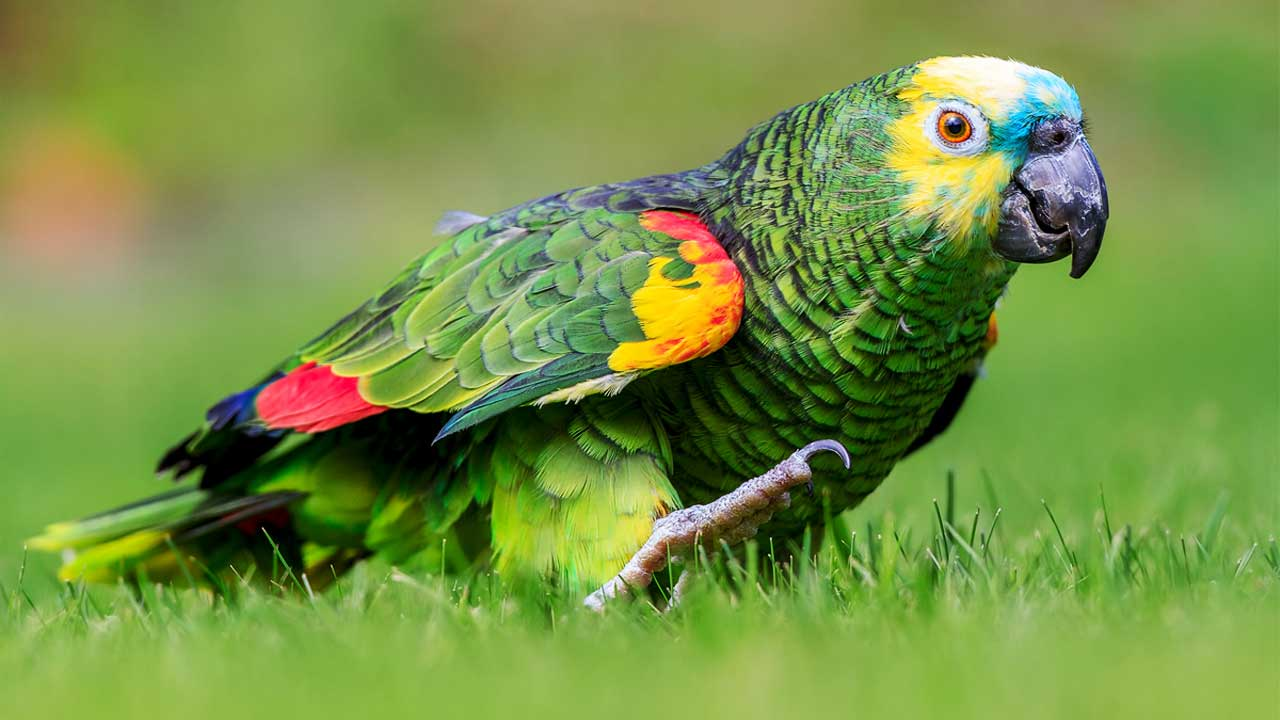

In [25]:

# URL da imagem
url = "https://cdn.jornaldebrasilia.com.br/wp-content/uploads/2021/03/09165626/papagaioCapa.jpg"

# Faz download e abre a imagem em memória
image_bytes = urlopen(url).read()
image = Image.open(io.BytesIO(image_bytes))

# Exibe a imagem no notebook
#image = image.convert('RGB')
print('Imagem: ', image.mode)
display(image)


## Passa para tons de cinza

Imagem:  RGB  tamanho  (1280, 720)


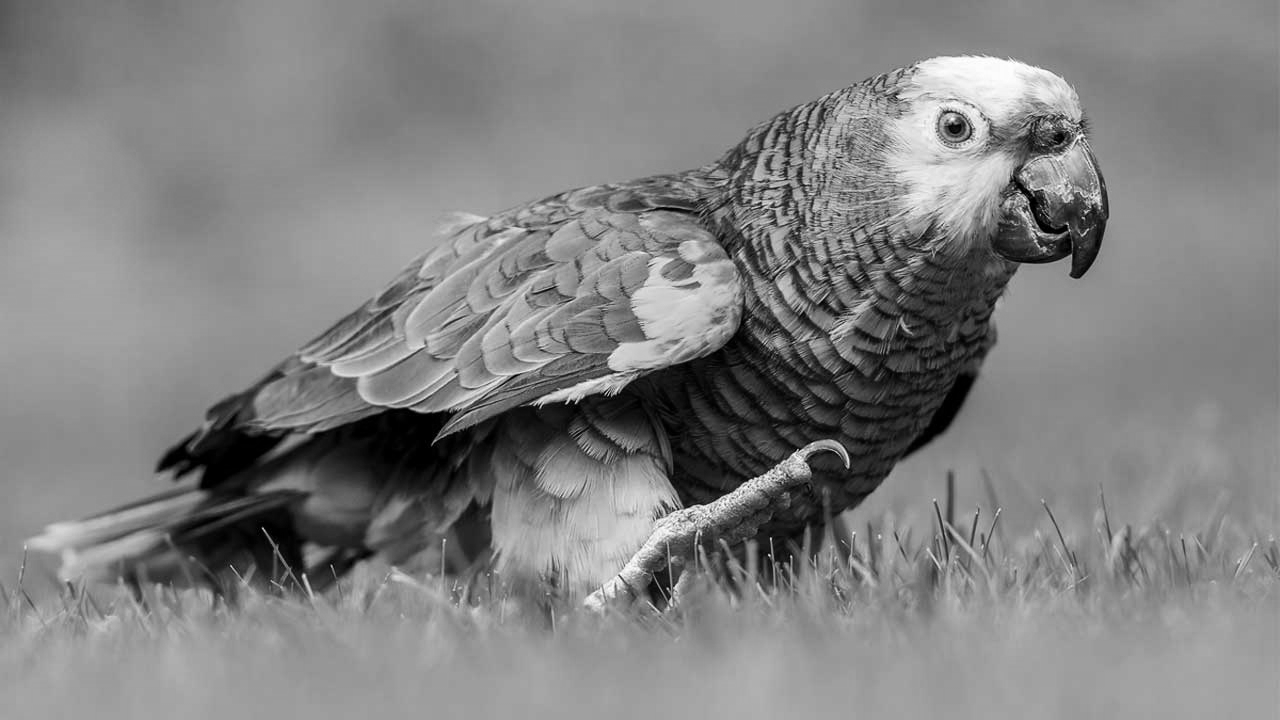

In [26]:
# Passo 1: pegar os pixels RGB da imagem original
pixels_raw = list(image.getdata())

# Passo 2: converter para tons de cinza
print('Imagem: ', image.mode, ' tamanho ', image.size)
# Ajusta para imagens RGBA (4 canais) e RGB (3 canais)
if image.mode == 'RGBA':
    pixels_cinza = [int(0.299*r + 0.587*g + 0.114*b) for (r, g, b, a) in pixels_raw]
elif image.mode == 'RGB':
    pixels_cinza = [int(0.299*r + 0.587*g + 0.114*b) for (r, g, b) in pixels_raw]
else:
    raise ValueError(f'Modo de imagem não suportado: {image.mode}')

# Passo 3: criar nova imagem modo 'L' (grayscale) com os pixels convertidos
imagem_cinza = Image.new('L', image.size)
imagem_cinza.putdata(pixels_cinza)

# Passo 4: exibir imagem em tons de cinza
display(imagem_cinza)

## E passa para 2 cores

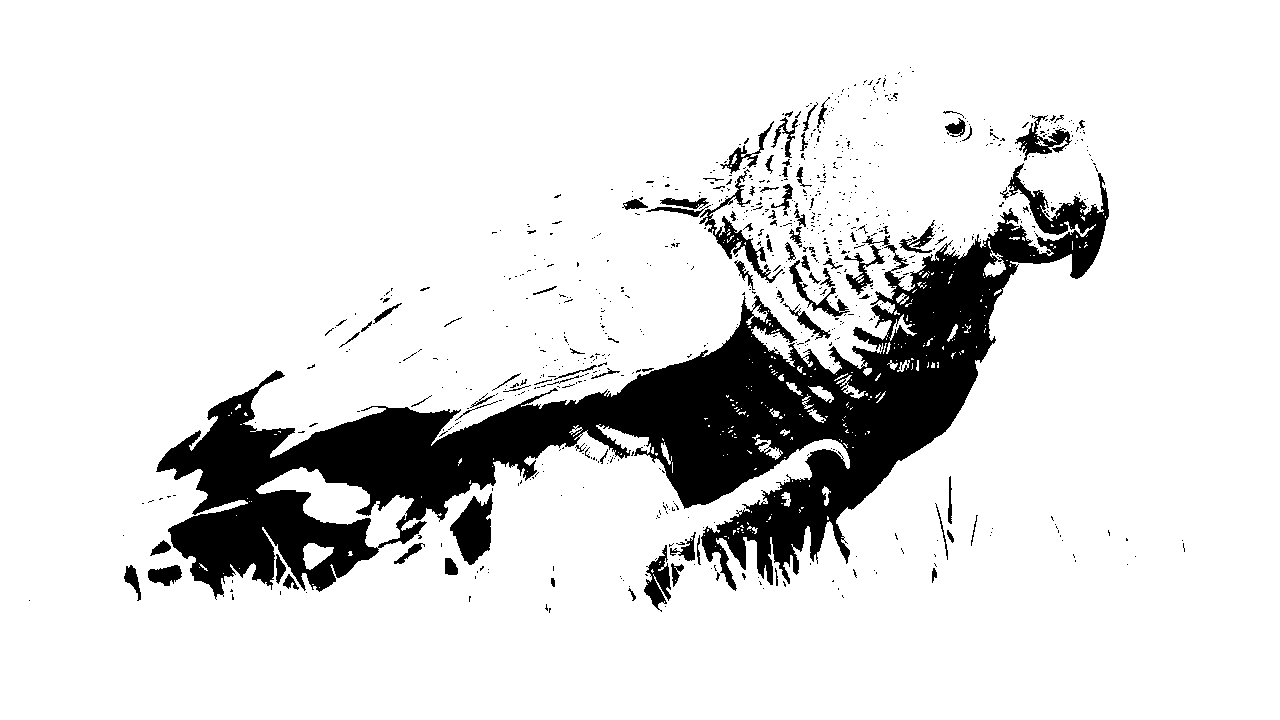

In [30]:
# Define o limiar (threshold)
limiar = 70

# Converte pixels de tons de cinza para binário (0 ou 255)
pixels_binario = [255 if p > limiar else 0 for p in pixels_cinza]

# Cria nova imagem modo 'L' e coloca os pixels binarizados
imagem_binaria = Image.new('L', image.size)
imagem_binaria.putdata(pixels_binario)

# Exibe a imagem binarizada no Colab
display(imagem_binaria)
